# Approximate Bayesian Computation

In [15]:
using Distributions, StatsPlots, Plots, StatsBase, LinearAlgebra
using LaTeXStrings
using SymPy
using VegaLite
using DataFrames
pyplot()

Plots.PyPlotBackend()

In [308]:
n, x = 8, 6
N = 50

# Sample θ' from prior π(θ)
# Generate z from p(.|θ')
theta_s = rand(Beta(1,1),N)
z       = rand.(Binomial.(n,theta_s))
theta_a = theta_s[z .== x];

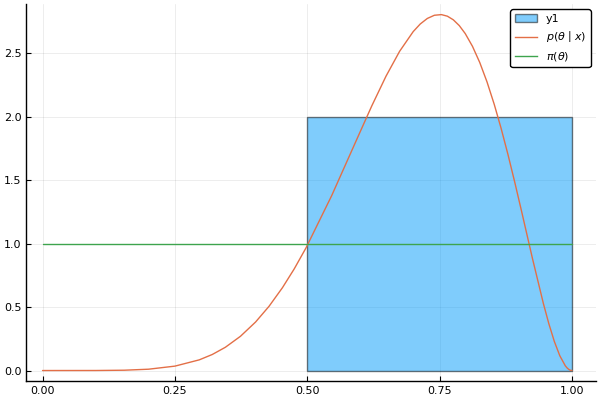

In [309]:
histogram(theta_a,normalize=true,alpha=0.5)
plot!(Beta(x+1,n-x+1),label=L"p(\theta \mid x)")
plot!(Beta(1,1), label =L"\pi(\theta)")

In [310]:
cm = countmap(z)
counter = zeros(length(cm))
hdots = zeros(N)
for (i,v) in enumerate(z)
    counter[v+1]+=1
    hdots[i] = counter[v+1]
end



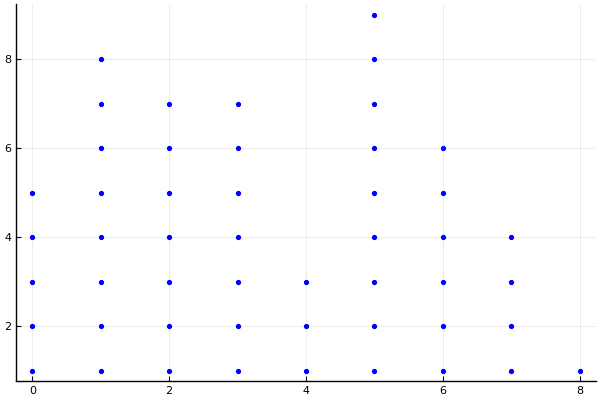

In [311]:
plot(z,hdots,marker=:o,color=:blue,linewidth=0,
    alpha=0.2, markeralpha = 1,
    markerstrokewidth=0.0,legend=false)

In [312]:
df = DataFrame([z,hdots]);

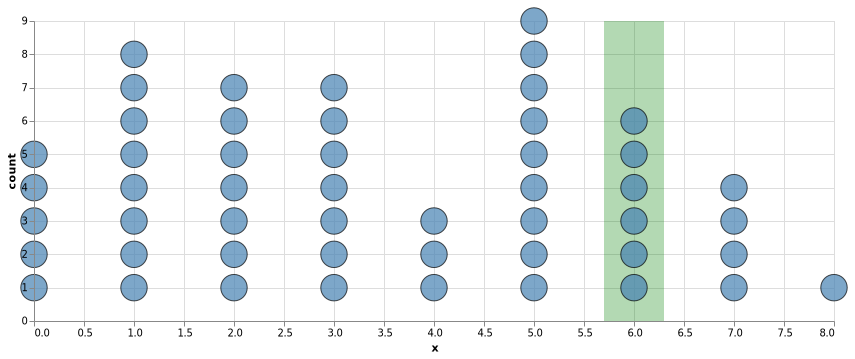

In [322]:
spec = [
@vlplot(width=800, height=300) + 
@vlplot(
    data={values={"start"=5.7,"finish"=6.3}},
    mark={:rect, color=:green},
    x={"start:q",axis={title=""}},
    x2="finish:q",
    opacity={value=0.3}
)+
@vlplot(
    data=df,
    mark={:circle,strokeWidth=1,stroke=:black,clip=false},
    size={value=35000/length(z)},
    color={value="#4682b4"},
    grid=false,
    x={"x1:q",axis={title="x"}},
    y={"x2:q",axis={title="count"}})
    
]
